In [132]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import SGD
from keras.optimizers import adam
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os, shutil
from keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D 
from tensorflow.keras.layers import ZeroPadding2D, BatchNormalization, Convolution2D
from tensorflow.keras.callbacks import EarlyStopping

In [133]:
tf.version.VERSION

'2.3.1'

In [134]:
train = os.path.join('/Users/AMINO/Desktop/Mod_4_Project/chest_xray/chest_xray/train')
test = os.path.join('/Users/AMINO/Desktop/Mod_4_Project/chest_xray/chest_xray/test')
validation = os.path.join('/Users/AMINO/Desktop/Mod_4_Project/chest_xray/chest_xray/val')

😀 Command Control Space

In [135]:
IMG_SIZE = (160, 160)

train_dataset = image_dataset_from_directory(train, image_size=IMG_SIZE)
test_dataset = image_dataset_from_directory(test, image_size=IMG_SIZE)
validation_dataset = image_dataset_from_directory(validation,image_size=IMG_SIZE)

Found 5216 files belonging to 2 classes.
Found 624 files belonging to 2 classes.
Found 16 files belonging to 2 classes.


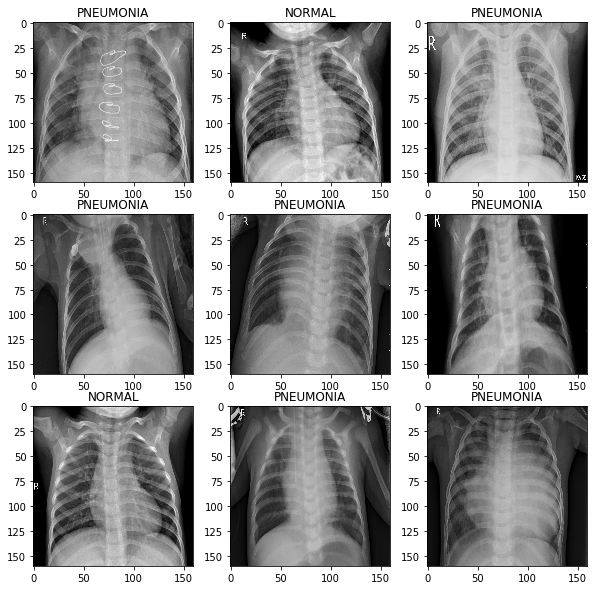

In [165]:
class_names = train_dataset.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis

## Model 1

In [166]:
# Initialising the CNN
 model = Sequential()

 # Step 1 - Convolution
 model.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

 # Step 2 - Pooling
 model.add(MaxPooling2D(pool_size = (2, 2)))

 # Adding a second convolutional layer
 model.add(Conv2D(32, (3, 3), activation = 'relu'))
 model.add(MaxPooling2D(pool_size = (2, 2)))

 model.add(Conv2D(32, (3, 3), activation = 'relu'))
 model.add(MaxPooling2D(pool_size = (2, 2)))

 # Step 3 - Flattening
 model.add(Flatten())

 # Step 4 - Full connection
 model.add(Dense(units = 128, activation = 'relu'))
 model.add(Dense(units = 1, activation = 'sigmoid'))
    
 print(model.summary())   

 # Compiling the CNN
 model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_90 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_74 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_75 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 12, 12, 32)        9248      
_________________________________________________________________
max_pooling2d_76 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
flatten_32 (Flatten)         (None, 1152)            

In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=model.fit_generator(training_set,
                         steps_per_epoch = 4000,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 1000)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
4000/4000 [==============================] - ETA: 0s - loss: 0.1612 - accuracy: 0.9371WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7ff7a1cda2f0> and will run it as-is.
Please report this to the TensorFlow team. When f

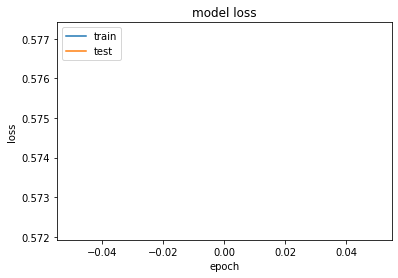

In [158]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


## Model 2

ReLU Activation

SGD optimzer

Dropout + Batch Normalization

Here i am doing new architecture with improving the previous architecture

In [150]:
output_dim=10
batch_size = 128 
nb_epoch = 50
input_shape = (64, 64, 3)
#Initialize model
model_2 = Sequential()

#CNN Layer 1
#input: 28X28 images with 1 channel -> (28X28X1) tensors.
#this applies 64 convolution filters of size 3X3 each.
model_2.add(ZeroPadding2D((1,1), input_shape=input_shape))
model_2.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model_2.add(Dropout(0.4))

#CNN Layer 2
model_2.add(ZeroPadding2D((1,1)))
model_2.add(Convolution2D(filters=64, kernel_size=(3,3), activation='relu', kernel_initializer='he_normal'))
model_2.add(MaxPooling2D((2,2), strides=(2,2)))
model_2.add(Dropout(0.4))

#Flatten the output before feeding these to the fully connected Neurons                                    
model_2.add(Flatten())

#Fully connected Layers
model_2.add(Dense(256, activation='relu', kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))

model_2.add(Dense(128, activation='relu', kernel_initializer='he_normal'))
model_2.add(BatchNormalization())
model_2.add(Dropout(0.5))
model_2.add(Dense(1, activation='sigmoid', kernel_initializer='he_normal'))

#Using adam as our optimzer
sgd = tf.keras.optimizers.SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)

#Get a summary of the model.
print(model_2.summary())

#Compile the model
model_2.compile(loss='binary_crossentropy', optimizer=sgd, metrics=['accuracy'])

Model: "sequential_39"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
zero_padding2d_30 (ZeroPaddi (None, 66, 66, 3)         0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 64, 64, 64)        1792      
_________________________________________________________________
dropout_58 (Dropout)         (None, 64, 64, 64)        0         
_________________________________________________________________
zero_padding2d_31 (ZeroPaddi (None, 66, 66, 64)        0         
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_62 (MaxPooling (None, 32, 32, 64)        0         
_________________________________________________________________
dropout_59 (Dropout)         (None, 32, 32, 64)      

In [153]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

history=model_2.fit_generator(training_set,
                         steps_per_epoch = 400,
                         epochs = 10,
                         validation_data = test_set,
                         validation_steps = 100)

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Epoch 1/10
400/400 [==============================] - 482s 1s/step - loss: 0.2079 - accuracy: 0.9195 - val_loss: 1.3295 - val_accuracy: 0.6601
Epoch 2/10
400/400 [==============================] - 486s 1s/step - loss: 0.1913 - accuracy: 0.9255 - val_loss: 1.9153 - val_accuracy: 0.6315
Epoch 3/10
400/400 [==============================] - ETA: 0s - loss: 0.1972 - accuracy: 0.9249

KeyboardInterrupt: 

In [ ]:
epochs = [i for i in range(12)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

## Model 3

ReLU Activation

RMSprop optimzer

Dropout

In [ ]:
# Initialising the CNN
model_3= Sequential()

# Step 1 - Convolution
model_3.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
model_3.add(MaxPooling2D(pool_size = (2, 2)))
model_3.add(Dropout(0.2))
# Adding a second convolutional layer
model_3.add(Conv2D(32, (3, 3), activation = 'relu'))
model_3.add(MaxPooling2D(pool_size = (2, 2)))
model_3.add(Dropout(0.2))
# Adding a third convolutional layer
model_3.add(Conv2D(32, (3, 3), activation = 'relu'))
model_3.add(MaxPooling2D(pool_size = (2, 2)))
model_3.add(Dropout(0.2))
# Step 3 - Flattening
model_3.add(Flatten())

# Step 4 - Full connection
model_3.add(Dense(units = 128, activation = 'relu'))
model_3.add(Dense(units = 1, activation = 'sigmoid'))

# Compiling the CNN
optim=tf.keras.optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=None, decay=0.0)
model_3.compile(optimizer = optim, loss = 'binary_crossentropy', metrics = ['accuracy'])

#summary
model_3.summary()

In [ ]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('chest_xray/train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('chest_xray/test',
                                            target_size = (64, 64),
                                            batch_size = 64,
                                            class_mode = 'binary')

history=model_3.fit_generator(training_set,
                         steps_per_epoch = 4000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 1000)